In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# EXERCISE 1

## Part a

In [2]:
np.random.seed(0)
n_nodes=500
G = nx.circulant_graph(n_nodes, [1, 2])


In [3]:
def model_epidemics(G=G,beta=0.3,ro=0.7,infected_start=10,weeks=15,N=100,n_nodes=500):
    G=G
    S_nodes=np.empty((N,weeks),dtype=int)
    I_nodes=np.empty((N,weeks),dtype=int)
    R_nodes=np.empty((N,weeks),dtype=int)
    new_I_nodes=np.empty((N,weeks),dtype=int)
    
    I_nodes[:,0] = infected_start 
    new_I_nodes[:,0] = infected_start
    S_nodes[:,0] = n_nodes-infected_start
    R_nodes[:,0] = 0
    
    for n in range(N):
    
        nodes_change = np.zeros((n_nodes, 2), dtype=int)
        for i in np.random.choice(G.nodes, size=(infected_start,),replace=False):
            nodes_change[i, 0] = 1
        for w in range(0,weeks):

            s_week=0
            i_week=0
            r_week=0
            new_i_week=0

            for node in G.nodes:
                if(nodes_change[node,0]==0):
                    m=0

                    for i in G.neighbors(node):
                        if nodes_change[i,0] == 1:#1 − (1 − β) m
                            m+=1
                    if np.random.random(1)[0] < (1-beta)**m:
                        nodes_change[node,1]=0
                        s_week = s_week + 1
                    else:
                        nodes_change[node,1]=1
                        new_i_week = new_i_week +1
                        i_week = i_week +1

                elif(nodes_change[node,0]==1):

                    if np.random.random(1)[0]< ro:
                        nodes_change[node,1]= 2
                        r_week= r_week + 1
                    else:
                        nodes_change[node,1] = 1
                        i_week = i_week + 1
                else:
                    nodes_change[node,1] = 2
                    r_week = r_week + 1
                
            S_nodes[n,w] = s_week
            I_nodes[n,w] = i_week
            R_nodes[n,w] = r_week
            new_I_nodes[n,w] = new_i_week
            nodes_change[:, 0] = nodes_change[:, 1]

    S_nodes_avg = np.mean(S_nodes, axis=0)
    I_nodes_avg = np.mean(I_nodes, axis=0)
    R_nodes_avg = np.mean(R_nodes, axis=0)
    new_I_nodes_avg = np.mean(new_I_nodes, axis=0)

    
    
    return S_nodes_avg, I_nodes_avg, R_nodes_avg, new_I_nodes_avg

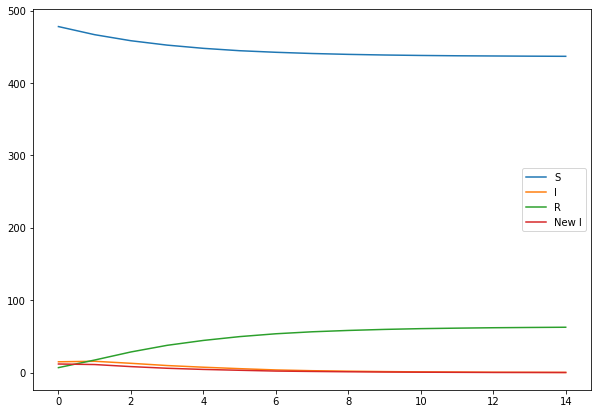

In [4]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics()
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

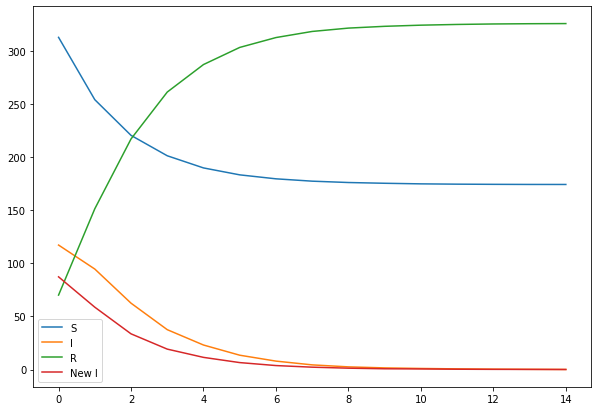

In [5]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics(infected_start=100)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

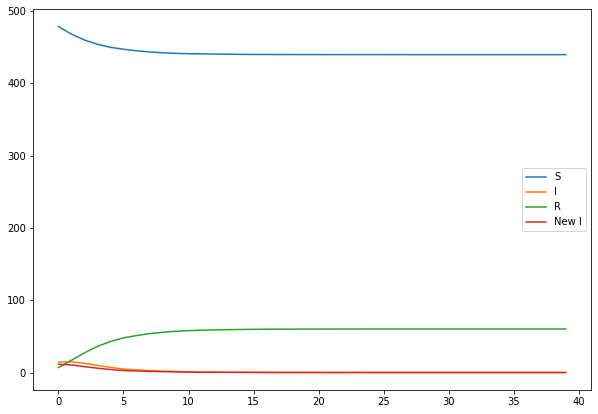

In [6]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics(weeks=40)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

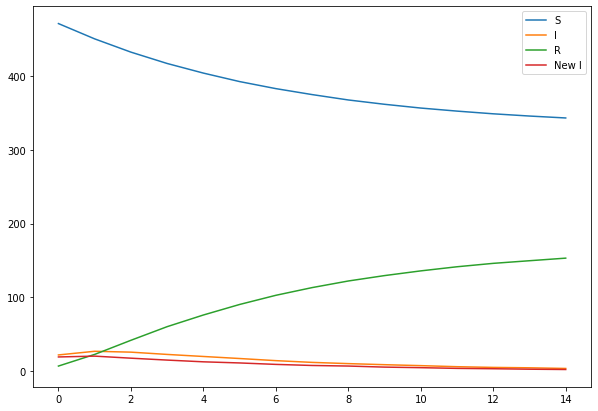

In [7]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics(beta=0.5)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

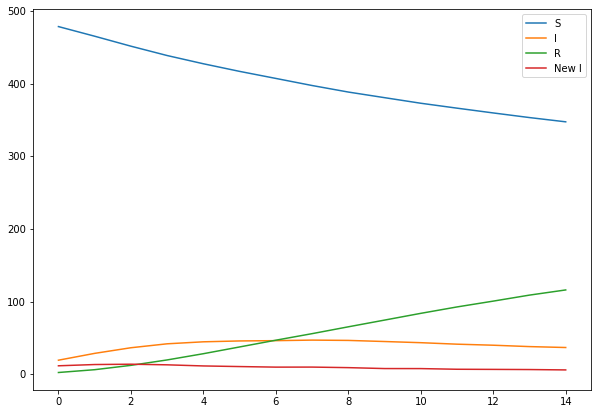

In [8]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics(ro=0.2)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

## Part b

In [9]:
def doRandomGraph(n_nodes=900,k=4):
    H = nx.complete_graph(k + 1)
    c = np.full((n_nodes), int(k/2), dtype=int) #Ogni volta che aggiungo un nodo, esso deve avere grado 2
    #Perciò: nodo 0 -> do grado 2
    #nodo 1 -> do grado 2 ecc.
    #print(c)

    #Problem of k odd

    if k % 2  != 0:
        c[::2] += 1 #[start:end:step].
    #print (c)
    #Alternativamente aggiungoo metà e tolgo metà
    #Fino a questo momento ho il grafo completo costituito da 5 nodi
    for i in range(k+1,n_nodes):#Parto dall'aggiungere il quinto nodo
        weights = np.empty(i,dtype=int)
        #print(weights)

        for node in H.nodes:
            #print(node)
            weights[node] = H.degree(node)
        weights_sum = np.sum(weights)
        #print(weights_sum)
        p = weights/weights_sum
        #print(p)
        #print(G.nodes)

        neighbors = np.random.choice(H.nodes, size=c[i], replace=False, p=p)
        
        for node in neighbors:
            H.add_edge(i, node)
    return H
        
        

Check if the average degree converges to the set k, if yes the graph generated is correct

In [10]:
RG=doRandomGraph(k=4)

deg = 0
for node in RG.nodes:
    deg += RG.degree(node)
print("Average degree:", deg/len(RG.nodes))

Average degree: 4.0


Check that the function manages to handle also odd numbers

In [11]:
RG=doRandomGraph(k=7)

deg = 0
for node in RG.nodes:
    deg += RG.degree(node)
print("Average degree:", deg/len(RG.nodes))

Average degree: 7.0


Make an image, with few nodes as toy example

Average degree: 3.0


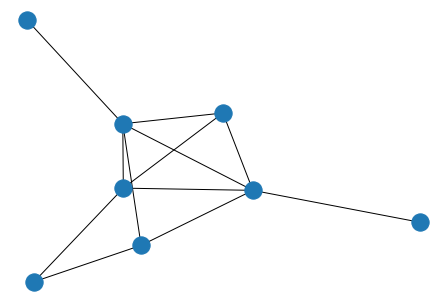

In [12]:
RG=doRandomGraph(k=3,n_nodes=8)

deg = 0
for node in RG.nodes:
    deg += RG.degree(node)
print("Average degree:", deg/len(RG.nodes))
nx.draw(RG)

# EXERCISE 2

In [13]:
np.random.seed(300)

k=6
n_nodes=500
H=doRandomGraph(n_nodes=n_nodes,k=k)

deg = 0
for node in H.nodes:
    deg += H.degree(node)
print("Average degree:", deg/len(H.nodes))


Average degree: 6.0


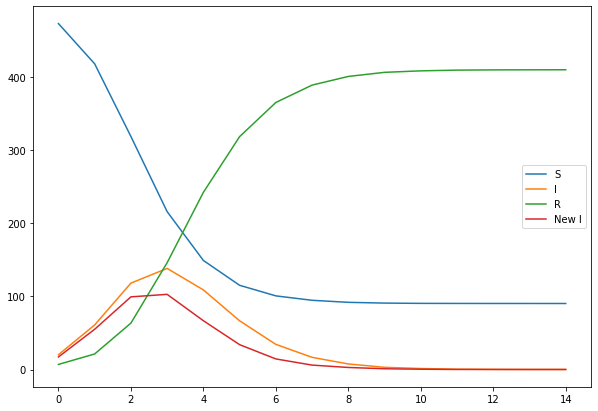

In [14]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics(G=H)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

# Exercise 3

In [57]:
def model_epidemics_vax(G=G,beta=0.3,ro=0.7,infected_start=10,weeks=15,N=100,n_nodes=500,vacc=vacc):
    G=G
    S_nodes=np.empty((N,weeks),dtype=int)
    I_nodes=np.empty((N,weeks),dtype=int)
    R_nodes=np.empty((N,weeks),dtype=int)
    new_I_nodes=np.empty((N,weeks),dtype=int)
    
    I_nodes[:,0] = infected_start 
    new_I_nodes[:,0] = infected_start
    S_nodes[:,0] = n_nodes-infected_start
    R_nodes[:,0] = 0
    
    vac_nodes = (vacc/100 * n_nodes).astype(int)#Take them as a percentage
    new_vac_nodes = np.array(vac_nodes) #Store them inside a numpy array
    new_vac_nodes[1:] = vac_nodes[1:] - vac_nodes[:-1]# persone da vaccinare a settimana t 
    #- persone vaccinate a settimana t
    
    
    
    for n in range(N):
    
        nodes_change = np.zeros((n_nodes, 2), dtype=int)
        for i, node in enumerate(np.random.choice( G.nodes, replace=False,size=(infected_start + vac_nodes[0],))): #devo aggiungere il numero di
            #vaccinati ad ogni iterazione
            
            if i<infected_start:
                nodes_change[node, 0] = 1
            else:
                nodes_change[node, 0] = 3
                
        for w in range(0,weeks):

            s_week=0
            i_week=0
            r_week=0
            new_i_week=0
            v_week=0
            new_v_week=0
            
            if new_vac_nodes[w]!=0:
                nodes_not_vax= np.arange(n_nodes)[nodes_change[:,0]!=3] #Salvo le persone da vaccinare
                #potenzialmente possono essere da vaccinare tutte quelle suscettibili, infettibili e 
                #recoveribili
                nodes_to_vax = np.random.choice(nodes_not_vax,replace=False, size=new_vac_nodes[w])
                #Scelgo, randomicamente, quali persone vaccinare, in accordo alle dosi disponibili per settimana
                for node in nodes_to_vax:
                    nodes_change[node, 0] = 3 #tutte le persone diventano vaccinate

            for node in G.nodes:
                if(nodes_change[node,0]==0):
                    m=0

                    for j in G.neighbors(node):
                        if nodes_change[j,0] == 1:
                            m+=1
                    if np.random.random(1)[0] < (1-beta)**m:
                        nodes_change[node,1]=0
                        s_week = s_week + 1
                    else:
                        nodes_change[node,1]=1
                        new_i_week = new_i_week +1
                        i_week = i_week +1

                elif(nodes_change[node,0]==1):

                    if np.random.random(1)[0]< ro:
                        nodes_change[node,1]= 2
                        r_week= r_week + 1
                    else:
                        nodes_change[node,1] = 1
                        i_week = i_week + 1
                elif(nodes_change[node,0] == 3):
                    nodes_change[node,1] = 3
                    
                else:
                    nodes_change[node,1] = 2
                    r_week = r_week + 1
                
            S_nodes[n,w] = s_week
            I_nodes[n,w] = i_week
            R_nodes[n,w] = r_week
            new_I_nodes[n,w] = new_i_week
            nodes_change[:, 0] = nodes_change[:, 1]

    S_nodes_avg = np.mean(S_nodes, axis=0)
    I_nodes_avg = np.mean(I_nodes, axis=0)
    R_nodes_avg = np.mean(R_nodes, axis=0)
    new_I_nodes_avg = np.mean(new_I_nodes, axis=0)

    
    
    return S_nodes_avg, I_nodes_avg, R_nodes_avg, new_I_nodes_avg, vac_nodes, new_vac_nodes

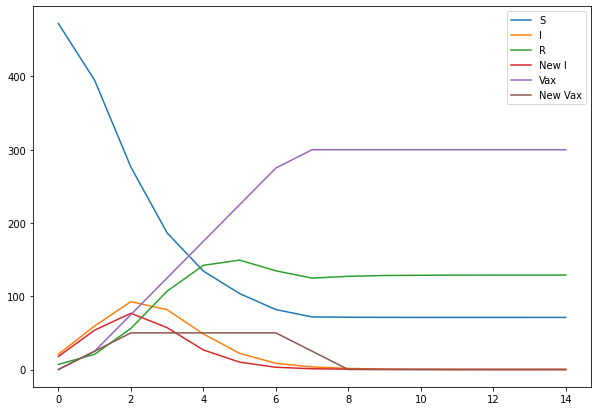

In [58]:
np.random.seed(42)
RG=doRandomGraph(k=6,n_nodes=500)
vacc = np.array([0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60])
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg,vac_nodes, new_vac_nodes = model_epidemics_vax(G=RG,beta=0.3,ro=0.7,infected_start=10,weeks=15,N=100,n_nodes=500,vacc=vacc)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.plot(vac_nodes, label='Vax')
ax.plot(new_vac_nodes,label='New Vax')
ax.legend(loc='best');

# EXERCISE 4